# Week 6 Weekly Activity  

## Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Question 1

In [2]:
img = cv.imread('boat.jpg')
boat = img.copy()

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
ret1, th1 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cnts = cv.findContours(th1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)



cv.imshow('Boat', img)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 2 

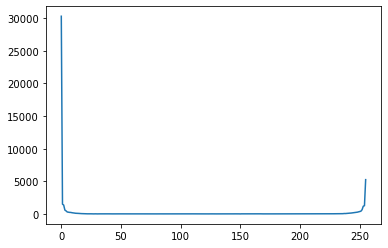

In [3]:
img = cv.imread('leaf.jfif')
hist = cv.calcHist([img], [0], None, [256],[0,256])

plt.plot(hist)
plt.show()

In [4]:
ret, th1 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)


In [5]:
# Default Kernel
kernel = np.ones((3,3), np.uint8)
    
# trackbar for erosion and dilation
def trackbar(x):
    erosion = cv.erode(th1, kernel,iterations = x)
    dilation = cv.dilate(th1,kernel, iterations = x)
    cv.imshow('window',np.hstack([erosion, dilation]))
trackbar(20)   

# trackbar for opening and closng
def kernel_value(y):
    kernel = np.ones((y,y), np.uint8)
    opening = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
    cv.imshow('window',np.hstack([opening,closing]))
kernel_value(10)


cv.createTrackbar('morphological transformation ', 'window', 25, 25, trackbar)
cv.createTrackbar('Kernel Size', 'window', 25, 25, kernel_value)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 3

In [6]:
img = cv.imread('porcelain2.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img is not None

True

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


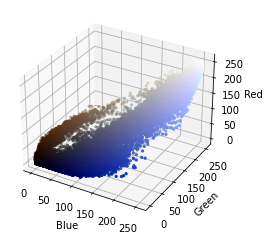

In [8]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

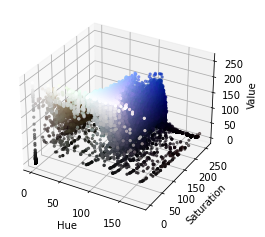

In [9]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")

axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

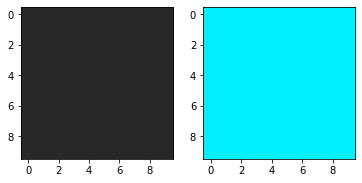

In [10]:
# Hue(100-130) Saturation(0-255) Value(40-255)
light_blue = (100,0, 40)
dark_blue = (130,255, 255)

square_light = np.full((10,10, 3), light_blue, dtype=np.uint8)/255.0
square_dark  = np.full((10,10,3), dark_blue, dtype=np.uint8)/255.0


plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(square_light))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(square_dark))

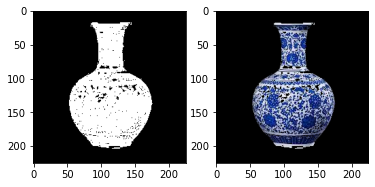

In [11]:
mask = cv.inRange(img_hsv, light_blue, dark_blue)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

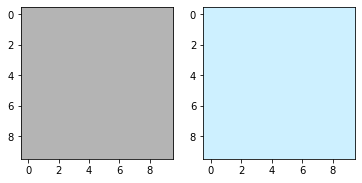

In [12]:
# Hue(0-100) Saturation(0-20) Value(100-255)
light_white = (0,0, 180)
dark_white = (140,50, 255)

square_light_white = np.full((10,10, 3), light_white, dtype=np.uint8)/255.0
square_dark_white  = np.full((10,10,3), dark_white, dtype=np.uint8)/255.0


plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(square_light_white))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(square_dark_white))

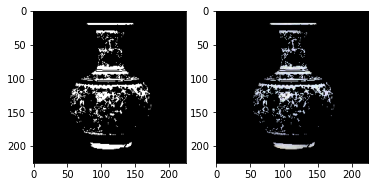

In [13]:
mask_white = cv.inRange(img_hsv, light_white, dark_white)
res_white = cv.bitwise_and(img, img, mask = mask_white)

plt.subplot(1,2,1)
plt.imshow(mask_white, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res_white)
plt.show()

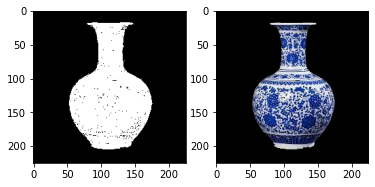

In [14]:
final_mask = mask + mask_white
final_result = cv.bitwise_and(img,img, mask=final_mask)

plt.subplot(1,2,1)
plt.imshow(final_mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(final_result)
plt.show()

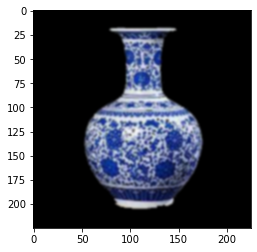

In [15]:
blur = cv.GaussianBlur(final_result, (5, 5), 0)
plt.imshow(blur)
plt.show()

In [16]:
resize_dim = (255,255)

In [17]:
def segmentProcess(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    light_blue = (100,0, 40)
    dark_blue = (130,255, 255)
    mask = cv.inRange(img_hsv, light_blue, dark_blue)
    
    light_white = (0,0, 150)
    dark_white = (140,50, 255)
    mask_white = cv.inRange(img_hsv, light_white, dark_white)

    final_mask = mask + mask_white
    final_result = cv.bitwise_and(img,img, mask=final_mask)
    
    blur = cv.GaussianBlur(final_result, (5, 5), 0)
    return blur

filename = "porcelain"

porcelain_list = []
for i in range(1,6):
    img_procelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim)
    procelain = cv.cvtColor(img_procelain, cv.COLOR_BGR2RGB)
    
    porcelain_list.append(procelain)
    
results = [segmentProcess(procelain) for procelain in porcelain_list]

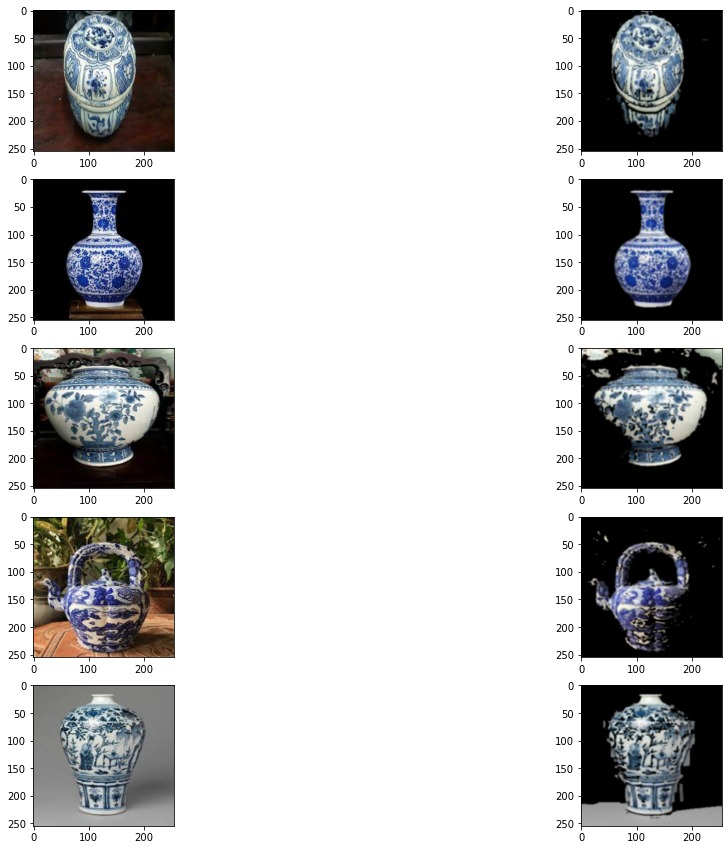

In [18]:
f, ax = plt.subplots(5,2, figsize = (18,15))
for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])
    
plt.show()